# Chapter 9

In [1]:
import sympy as sp
from sympy import symbols, sqrt, init_printing
from sympy_equation import Eqn, solve, table_of_expressions
from ambiance import Atmosphere
import numpy as np
import pint
import pygasflow
from pygasflow import *
from pygasflow.atd import *
init_printing()
pygasflow.defaults.solver_to_dict = True

ureg = pint.UnitRegistry()
# use "~P" to format units with unicode
ureg.formatter.default_format = "~"
pygasflow.defaults.pint_ureg = ureg
K = ureg.K
m = ureg.m
cm = ureg.cm
km = ureg.km
s = ureg.s
J = ureg.J
W = ureg.W
kg = ureg.kg
deg = ureg.deg
atm = ureg.atm
N = ureg.N
Q_ = ureg.Quantity

## P 9.1

In [2]:
c_p0 = 1.8275
M_inf = 8.03

### (a)

In [3]:
c_ps = pressure_coefficient(M_inf, stagnation=True)
c_ps

### (b)

In [4]:
c_ps = pressure_coefficient(M_inf * 1e06, stagnation=True)
c_ps

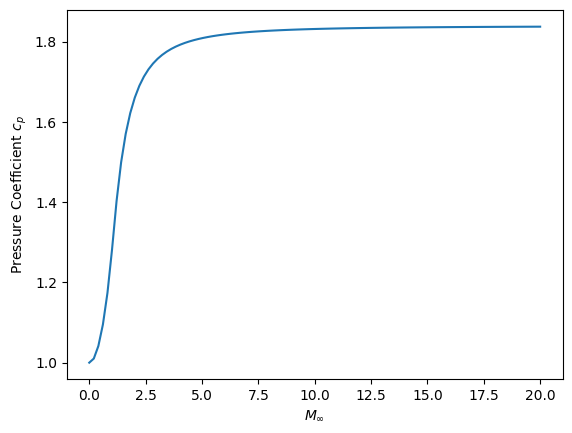

In [5]:
import matplotlib.pyplot as plt

M_infs = np.linspace(1e-05, 20, 100)
fig, ax = plt.subplots()
ax.plot(M_infs, pressure_coefficient(M_infs, stagnation=True))
ax.set_xlabel(r"$M_{\infty}$")
ax.set_ylabel("Pressure Coefficient $c_{p}$")
plt.show()

## P 9.2

In [6]:
c_ps = 1.8392
gamma = 1.4

### (a)

In [7]:
M_inf = 6
# by inverting the definition of c_ps for supersonic case
# see source code of `pressure_coefficient`
pt2_p1 = c_ps / 2 * gamma * M_inf**2 + 1
pt2_p1

### (b)

In [8]:
M_inf = 8.03
pt2_p1 = c_ps / 2 * gamma * M_inf**2 + 1
pt2_p1

### (c)

In [9]:
M_inf = 10
pt2_p1 = c_ps / 2 * gamma * M_inf**2 + 1
pt2_p1

## P 9.3

In [10]:
# Table 9.6
M_inf = 12.66
T_inf = 64.5 * K
Re_inf_u = 985.45 / cm
lambda_inf = 0.021 * cm
T_w = 285 * K
Lsfr = 6.676 * cm

x = 2
delta_y = 0.00817
y = 400 * delta_y

## P 9.4

In [11]:
mu_argon = lambda T: T**0.75 * kg / (m * s)
x = 1

# Table 9.6
M_inf = 12.66
T_inf = 64.5 * K
Re_inf_u = 985.45 / cm
lambda_inf = 0.021 * cm
T_w = 285 * K
Lsfr = 6.676 * cm

In [12]:
C_inf = chapman_rubesin(T_w, T_inf, func=mu_argon)
C_inf

<Quantity(0.689729361, 'dimensionless')>

In [13]:
Re_inf = Re_inf_u * x * Lsfr
Re_inf

<Quantity(6578.8642, 'dimensionless')>

In [14]:
Chi = interaction_parameter(M_inf, Re_inf, C_inf, laminar=True)
Chi

<Quantity(20.7761472, 'dimensionless')>

In [15]:
V = rarefaction_parameter(M_inf, Re_inf, C_inf)
V

<Quantity(0.129627636, 'dimensionless')>

Assuming cold wall:

In [16]:
Chi_u = Chi * np.sqrt(x * Lsfr)
x_crit_cold = critical_distance(Chi_u, weak=False, cold_wall=True)
x_crit_cold

<Quantity(17.0513846, 'centimeter')>

Assuming hot wall:

In [17]:
x_crit_hot = critical_distance(Chi_u, weak=False, cold_wall=False)
x_crit_hot

<Quantity(180.105249, 'centimeter')>

## P 9.5

In [18]:
mu_air = lambda T: T**0.65 * kg / (m * s)
T_w = 1500 * K

# Table 7.9
M_inf = 6.8
T_inf = 231.5 * K
Re_inf_u = 1.5e06 / m
L = 55 * m
alpha = 6 * deg
x = 1 * m

In [19]:
C_inf = chapman_rubesin(T_w, T_inf, func=mu_air)
C_inf

<Quantity(0.519949192, 'dimensionless')>

In [20]:
Re_inf = Re_inf_u * x
Chi = interaction_parameter(M_inf, Re_inf, C_inf, laminar=True)
Chi

<Quantity(0.185123504, 'dimensionless')>

In [21]:
V = rarefaction_parameter(M_inf, Re_inf, C_inf)
V

<Quantity(0.00400353599, 'dimensionless')>

For a hot wall (as specified by the problem):

In [22]:
Chi_u = Chi * np.sqrt(x)
critical_distance(Chi_u, weak=False, cold_wall=False)

<Quantity(0.00214191949, 'meter')>

Very small critical distance. Hence, if the lower stage would have a sharp nose, strong interaction phenomena could be neglected.

## P 9.6

In [23]:
M_inf = 10
H = 50e03 * m
T_w = 1500 * K
gamma = 1.4
R = 287.05 * J / (kg * K)
mu_air = lambda T: 0.04644e-05 * T.magnitude**0.65 * (kg / (m * s))
x = 1 * m

In [24]:
atmosphere = Atmosphere(H.magnitude)
T_inf = atmosphere.temperature[0] * K
rho_inf = atmosphere.density[0] * kg / m**3
a_inf = sound_speed(gamma, R, T_inf)
v_inf = a_inf * M_inf
mu_inf = mu_air(T_inf)
Re_inf_u = Reynolds(rho_inf, v_inf, mu_inf, Q_(1)).to("1 / m")
Re_inf_u

<Quantity(191340.652, '1 / meter')>

In [25]:
C_inf = chapman_rubesin(T_w, T_inf, func=mu_air)
C_inf

<Quantity(0.549175141, 'dimensionless')>

In [26]:
Chi = interaction_parameter(M_inf, Re_inf_u * x, C_inf)
Chi

<Quantity(1.6941498, 'dimensionless')>

In [27]:
V = rarefaction_parameter(M_inf, Re_inf_u * x, C_inf)
V

<Quantity(0.016941498, 'dimensionless')>

In [28]:
# eq (9.40)
Chi_u = Chi * np.sqrt(x)
# cold_wall=False because hot surface
critical_distance(Chi_u, weak=False, cold_wall=False)

<Quantity(0.179383973, 'meter')>